<a href="https://colab.research.google.com/github/Hound36114/START-OF-PROJECTS/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns

In [46]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [49]:
import yfinance as yf# Define tickers and date range
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
start = "2006-01-01"
end = "2016-01-01"

# Download data for all tickers
data = yf.download(tickers, start=start, end=end, group_by='ticker')

# Access individual dataframes
BAC = data['BAC']
C = data['C']
GS = data['GS']
JPM = data['JPM']
MS = data['MS']
WFC = data['WFC']

print(BAC.head())

/tmp/ipython-input-1752613448.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end, group_by='ticker')
[*********************100%***********************]  6 of 6 completed

Price            Open       High        Low      Close    Volume
Date                                                            
2006-01-03  30.714867  30.885070  30.210810  30.819609  16296700
2006-01-04  30.767248  30.924358  30.407206  30.492308  17757900
2006-01-05  30.492325  30.655981  30.322122  30.531601  14970700
2006-01-06  30.636332  30.708341  30.341752  30.485769  12599800
2006-01-09  30.583954  30.747610  30.348290  30.505398  15619400


In [50]:
import yfinance as yf

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
start = "2006-01-01"
end = "2016-01-01"

# Use yfinance to download all data at once
df = yf.download(tickers, start=start, end=end, group_by='ticker', auto_adjust=False)

[*********************100%***********************]  6 of 6 completed


In [51]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [52]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [53]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info        Open       High        Low      Close    Volume        Open   
Date                                                                            
2006-01-03   30.714867  30.885070  30.210810  30.819609  16296700  317.463636   
2006-01-04   30.767248  30.924358  30.407206  30.492308  17757900  316.556545   
2006-01-05   30.492325  30.655981  30.322122  30.531601  14970700  313.835322   
2006-01-06   30.636332  30.708341  30.341752  30.485769  12599800  316.686010   
2006-01-09   30.583954  30.747610  30.348290  30.505398  15619400  314.872006   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low       Close   Volume  ...       Open   
Date                                                      ...              
2006-01-03   319.925591  311.697464  319.342499  1537600  ...  31.094307   
2006-01-04   318.111465  313.252328  313.446686  1870960  ...  31.926472   
2006-01-05   316.038126  313.576172  315.001526  1143160  ...  31.844895   
2006-01-06   316.815595  312.280402  315.001526  1370210  ...  31.964539   
2006-01-09   315.779041  312.928352  313.511444  1680740  ...  31.888396   

Bank Ticker                                                  WFC             \
Stock Info        High        Low      Close   Volume       Open       High   
Date                                                                          
2006-01-03   31.812247  30.860436  31.714346  5377000  18.391971  18.610230   
2006-01-04   32.241929  31.736109  31.736109  7977800  18.508373  18.520013   
2006-01-05   31.866652  31.556633  31.823139  5778000  18.333770  18.365781   
2006-01-06   32.008050  31.572936  31.855761  6889800  18.380331  18.493826   
2006-01-09   32.247365  31.882956  32.192974  4144500  18.435629  18.522933   

Bank Ticker                                  
Stock Info         Low      Close    Volume  
Date                                         
2006-01-03   18.156251  18.566578  11016400  
2006-01-04   18.255192  18.351227  10870000  
2006-01-05   18.223185  18.330860  10158000  
2006-01-06   18.266837  18.438534   8403800  
2006-01-09   18.365787  18.435629   5619600  

[5 rows x 30 columns]

In [54]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

,0
Bank Ticker,
BAC,37.271408
C,380.724274
GS,184.167374
JPM,53.346733
MS,49.715771
WFC,43.769428


r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}}

In [55]:
returns = pd.DataFrame()

In [56]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001289,0.004960,-0.000394,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004730,0.012031,0.016241,0.010586,-0.000158


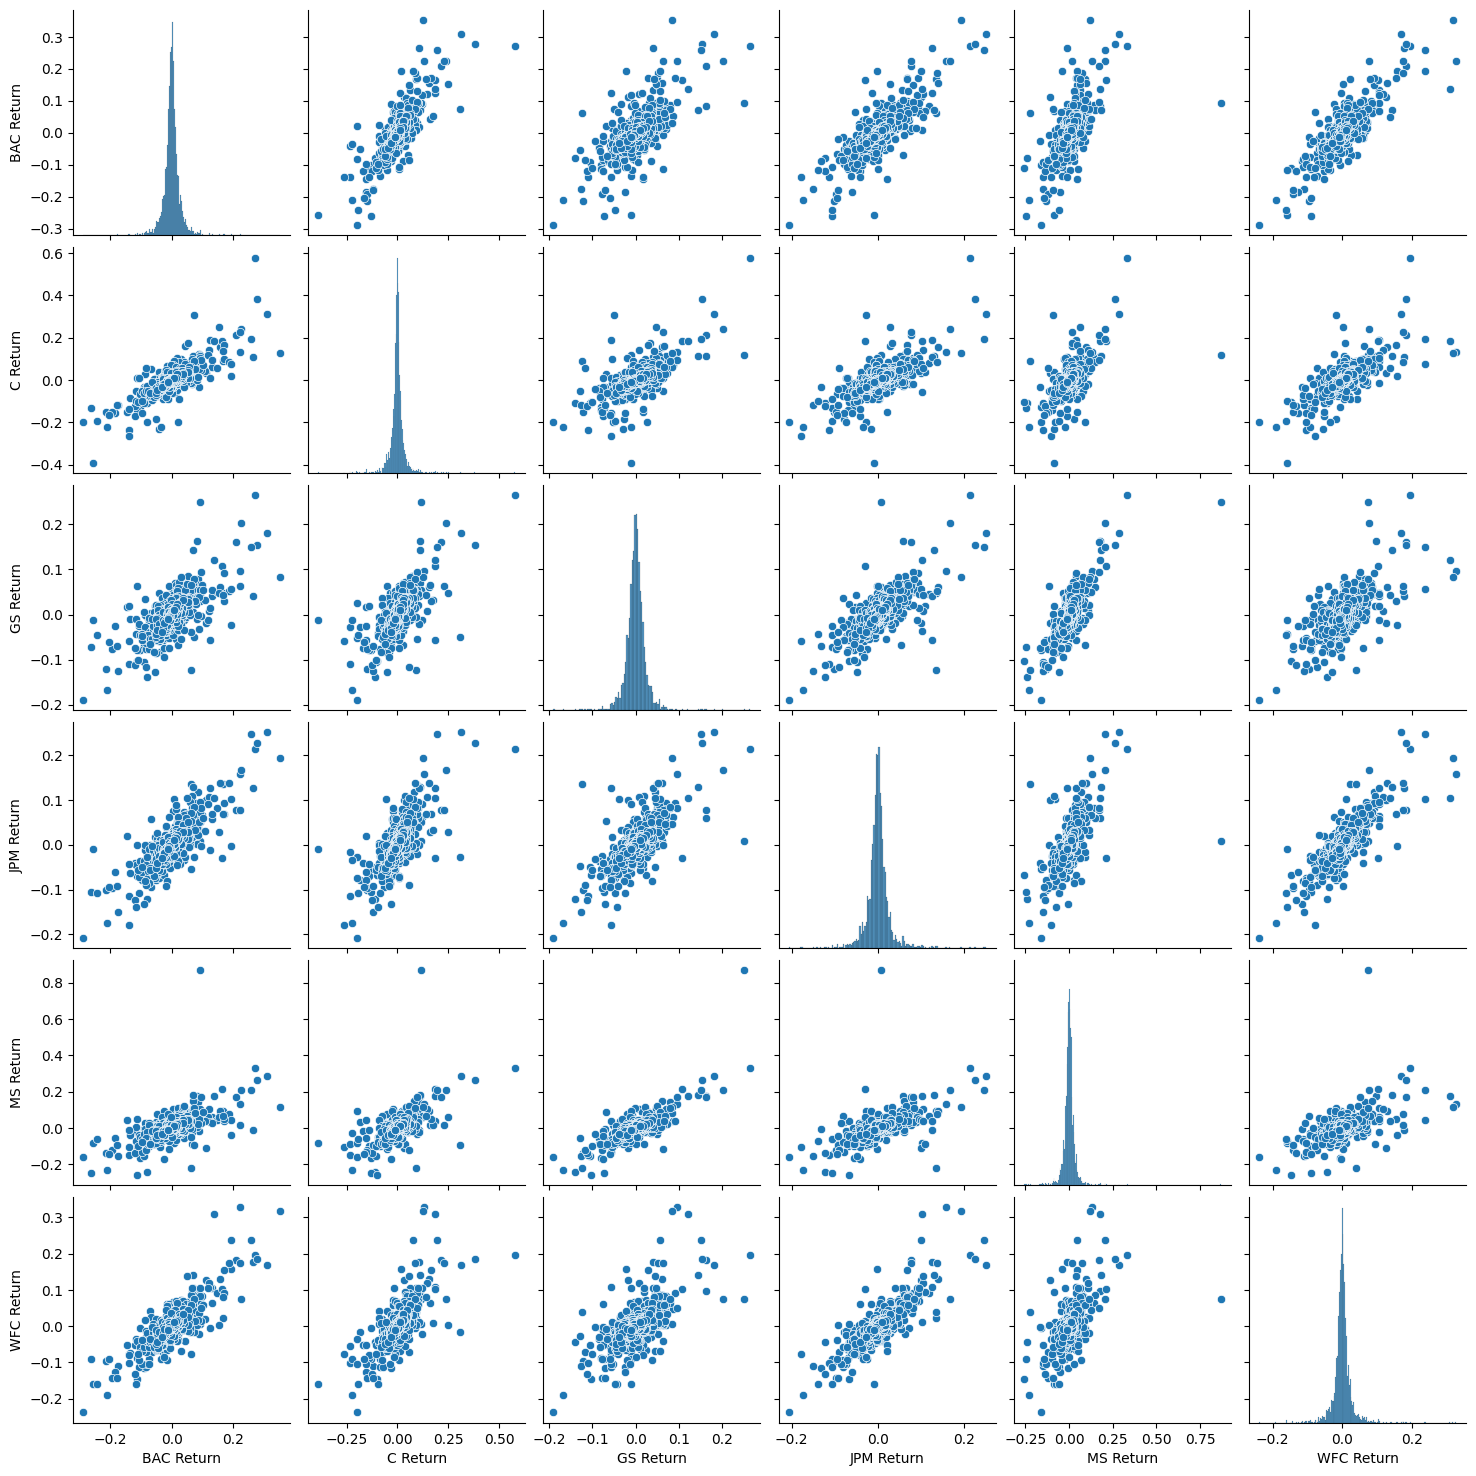

In [57]:
import seaborn as sns
sns.pairplot(returns[1:])

In [58]:
returns.idxmin()


,0
BAC Return,2009-01-20
C Return,2009-02-27
GS Return,2009-01-20
JPM Return,2009-01-20
MS Return,2008-10-09
WFC Return,2009-01-20


In [59]:
returns.idxmax()

,0
BAC Return,2009-04-09
C Return,2008-11-24
GS Return,2008-11-24
JPM Return,2009-01-21
MS Return,2008-10-13
WFC Return,2008-07-16


In [60]:
returns.std() # Citigroup riskiest

,0
BAC Return,0.036659
C Return,0.038672
GS Return,0.025386
JPM Return,0.027675
MS Return,0.037717
WFC Return,0.030195


In [64]:
risk_= returns.loc['2006-01-01':'2016-12-31'].std()
risk_.index = [ticker + " Return" for ticker in risk_.index]
print(risk_)

BAC Return Return    0.036659
C Return Return      0.038672
GS Return Return     0.025386
JPM Return Return    0.027675
MS Return Return     0.037717
WFC Return Return    0.030195
dtype: float64


In [66]:
returns.loc['2006-01-01':'2016-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

,0
BAC Return,0.036659
C Return,0.038672
GS Return,0.025386
JPM Return,0.027675
MS Return,0.037717
WFC Return,0.030195


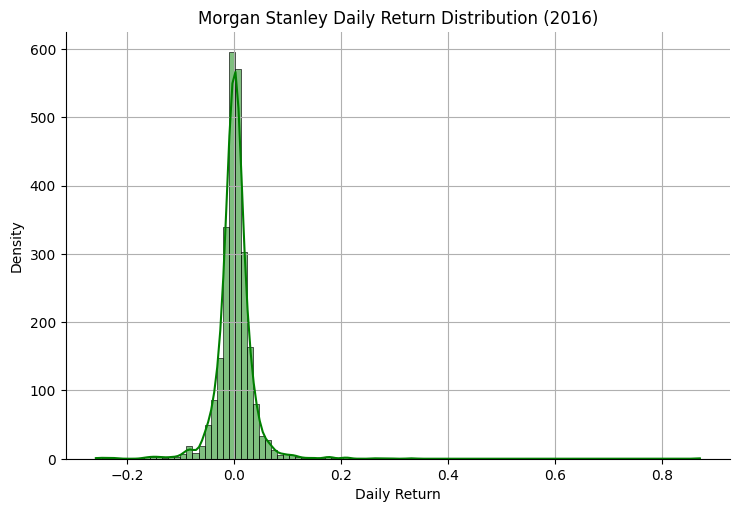

In [71]:

import matplotlib.pyplot as plt

sns.displot(
    data=returns,
    x='MS Return',
    bins=100,
    kde=True,
    color='green',
    height=5,        # controls the plot height in inches
    aspect=1.5       # width = height * aspect
)

plt.title("Morgan Stanley Daily Return Distribution (2016)")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.grid(True)
plt.show()


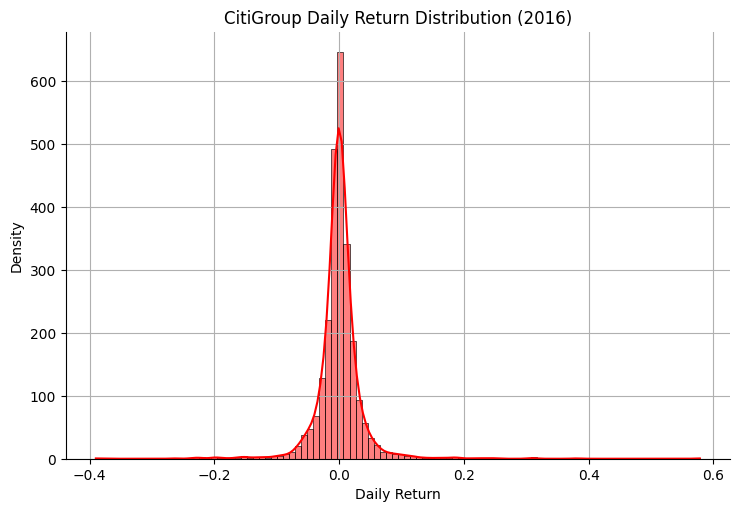

In [72]:
sns.displot(
    returns.loc['2006-01-01':'2016-12-31']['C Return'].dropna(),
    bins=100,
    kde=True,
    color='red',
    height=5,
    aspect=1.5
)

plt.title("CitiGroup Daily Return Distribution (2016)")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

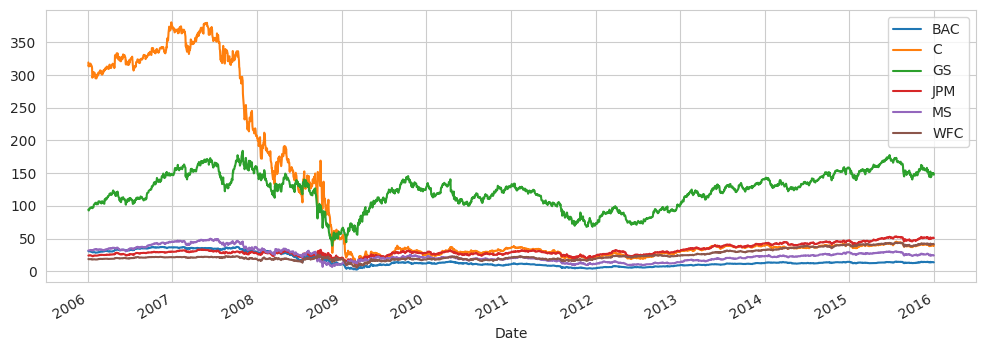

In [74]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

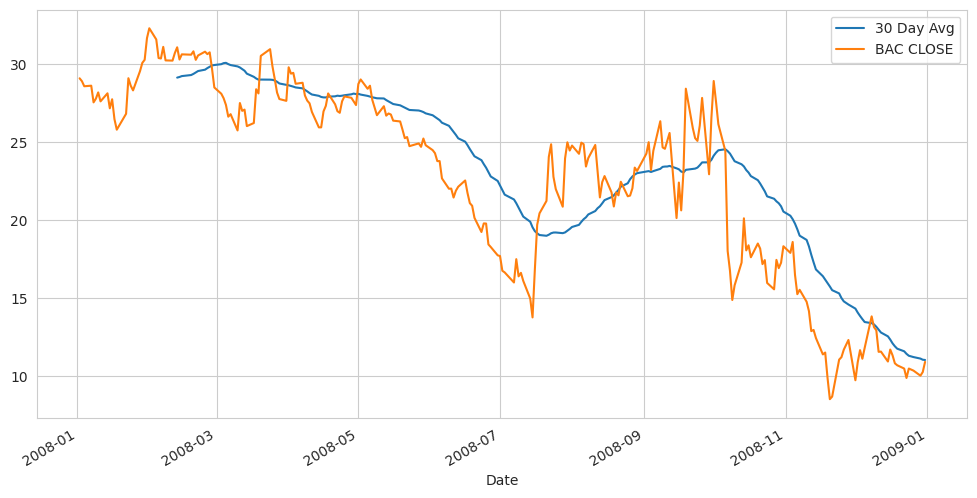

In [79]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

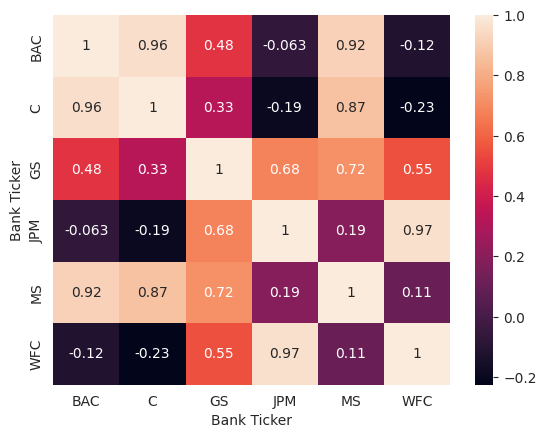

In [80]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

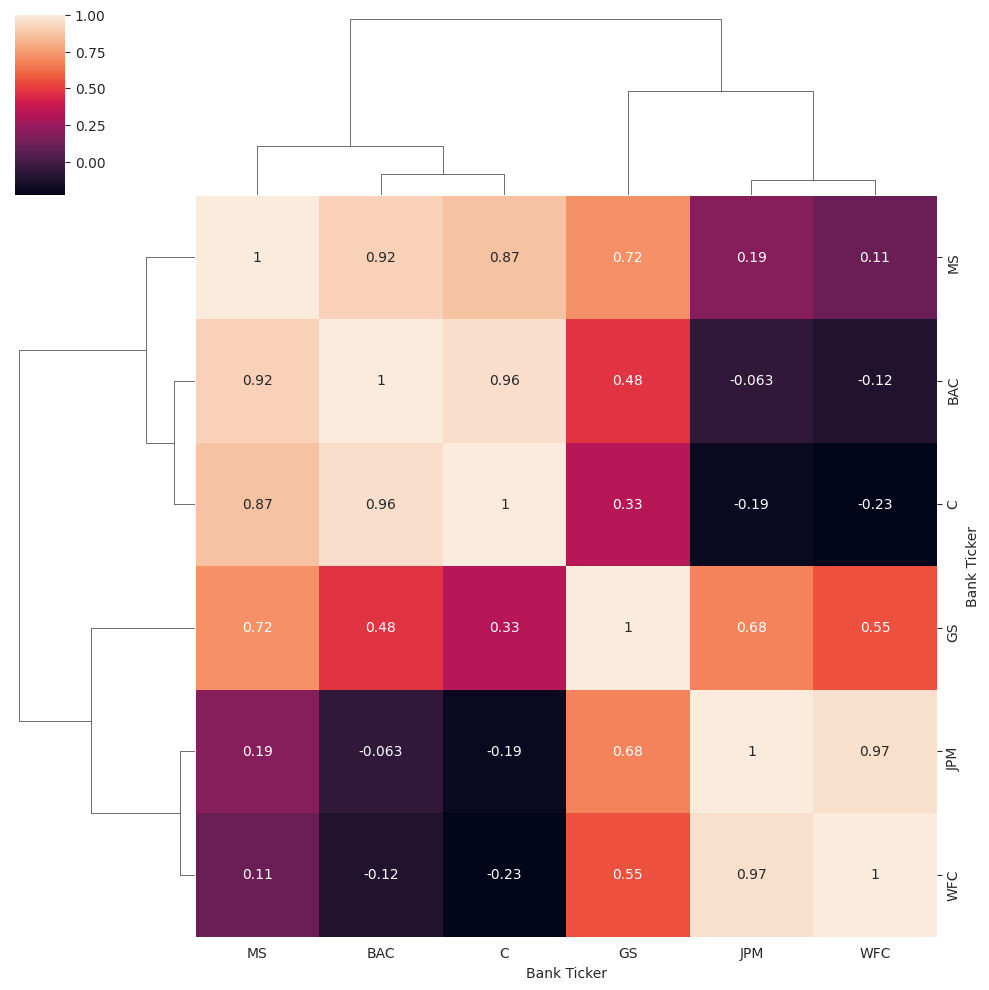

In [81]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)